Headers aplicables a todas las funciones

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
from src.genetic.genetic_algorithm import genetic_algorithm, generate_start_population
from src.utils import get_palette
from csv import reader

def plot_evolution(best_of_each_generation_array, name):
    # Gráfico de evolución de cada sujeto
    n = len(best_of_each_generation_array)  # number of arrays
    M = max(len(a) for a in best_of_each_generation_array)

    for i in range(n):
        best_of_each_generation_array[i] += [None] * (M - len(best_of_each_generation_array[i]))

    for i in range(n):
        plt.plot(range(M), best_of_each_generation_array[i], label="")
        
    plt.title(f'Mejor de cada generación para {name}')
    plt.xlabel("Generación")
    plt.ylabel("Aptitud")
    plt.show()
    
    print(best_of_each_generation_array)

selection_options = ["ELITE", "ROULETTE", "UNIVERSAL", "TOURNAMENT_DETERMINISTIC", "TOURNAMENT_PROBABILISTIC"]
crossing_options = ["ONE_POINT", "DOUBLE_POINT", "ANGULAR", "UNIFORM"]
mutation_options = ["ONE_GEN", "MULTIGEN_LIMITED", "MULTIGEN_UNIFORM", "COMPLETE"]
select_new_generation_options = ["USE_ALL", "NEW_OVER_ACTUAL"]
color_count = 2
N = 100
K = 100
palette = get_palette("./src/colores.csv")
print(palette)
d_error = 0.01
time = -1
max_generations = 2

target_colors = []
start_population = []
for i in range(color_count):
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    start_population.append(generate_start_population(N, palette, color))
    target_colors.append(color)
    

    
print(target_colors)

[[  0   0   0]
 [255   0   0]
 [  0 255   0]
 [  0   0 255]
 [255 255   0]
 [  0 255 255]
 [255   0 255]
 [255 255 255]]
[(59, 190, 249), (143, 127, 16)]


Run variando select

ELITE


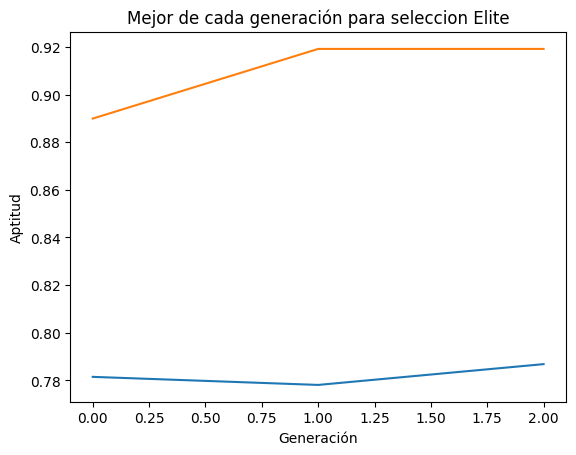

[[0.7814894546183143, 0.7781048659660466, 0.7868338763375082], [0.8899081036336659, 0.9191520659546736, 0.9191520659546736]]
ROULETTE


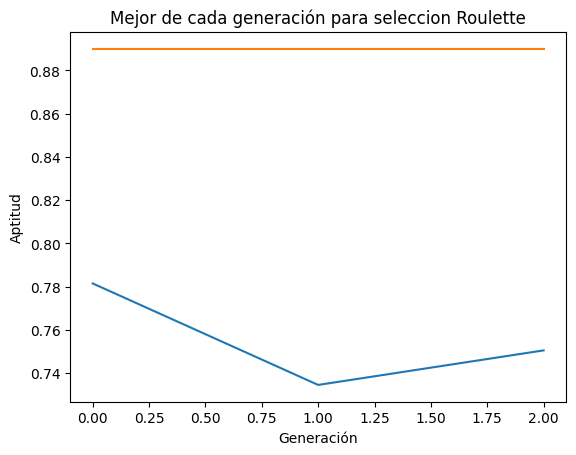

[[0.7814894546183143, 0.7345691368371503, 0.7505331260672689], [0.8899081036336659, 0.8899081036336659, 0.8899081036336659]]
UNIVERSAL


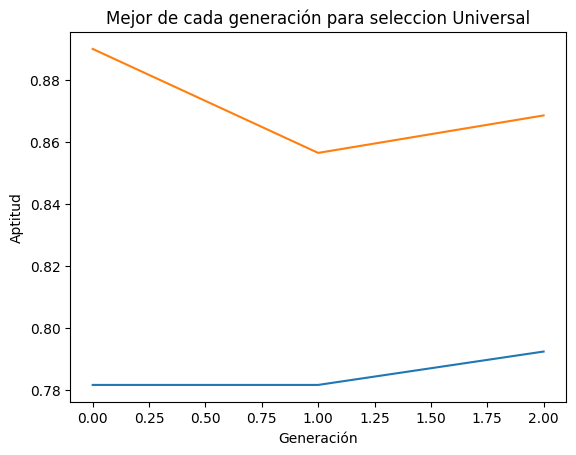

[[0.7814894546183143, 0.7814894546183143, 0.7922596832099585], [0.8899081036336659, 0.8563570818251267, 0.868444672322779]]
TOURNAMENT_DETERMINISTIC


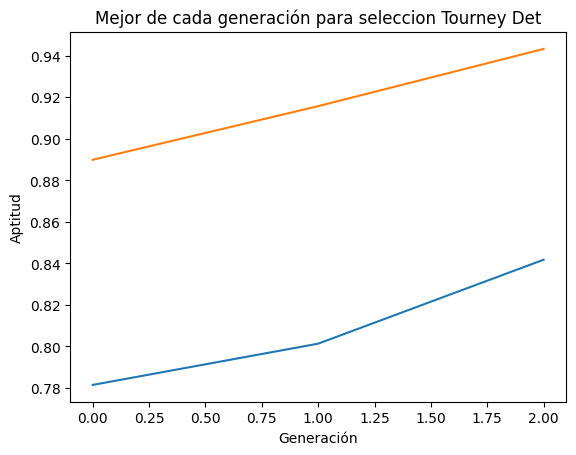

[[0.7814894546183143, 0.8013516561251617, 0.8417798064760512], [0.8899081036336659, 0.9157316982799976, 0.9432857840820364]]
TOURNAMENT_PROBABILISTIC


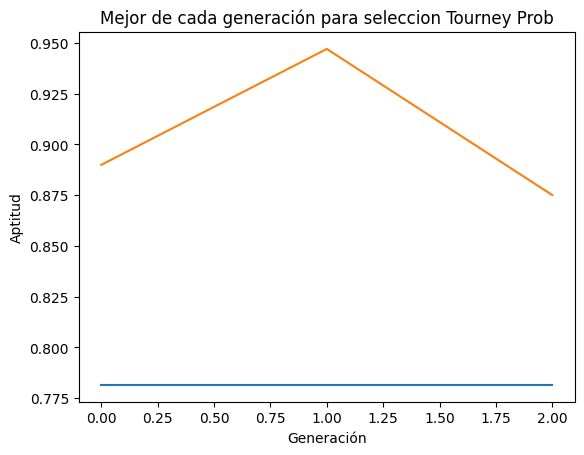

[[0.7814894546183143, 0.7814894546183143, 0.7814894546183143], [0.8899081036336659, 0.9469982980485291, 0.8750265662227178]]
[0.1565157175064087, 0.1440187692642212, 0.15299487113952637, 0.15151846408843994, 0.15147531032562256]
[0.0024648319946141044, 0.0006921355462459018, 0.013401854889494084, 0.005310418618675626, 0.0024644948198260176]
[2.0, 2.0, 2.0, 2.0, 2.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


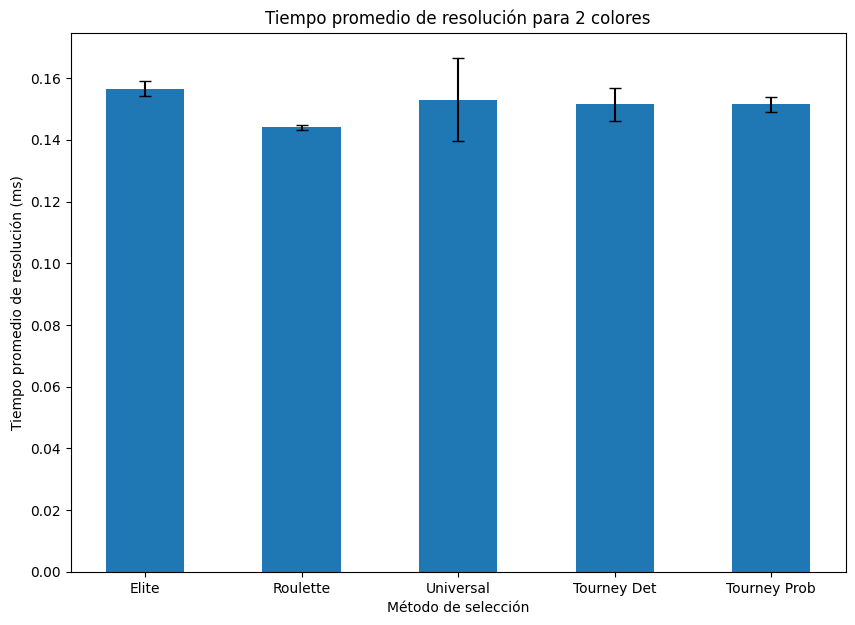

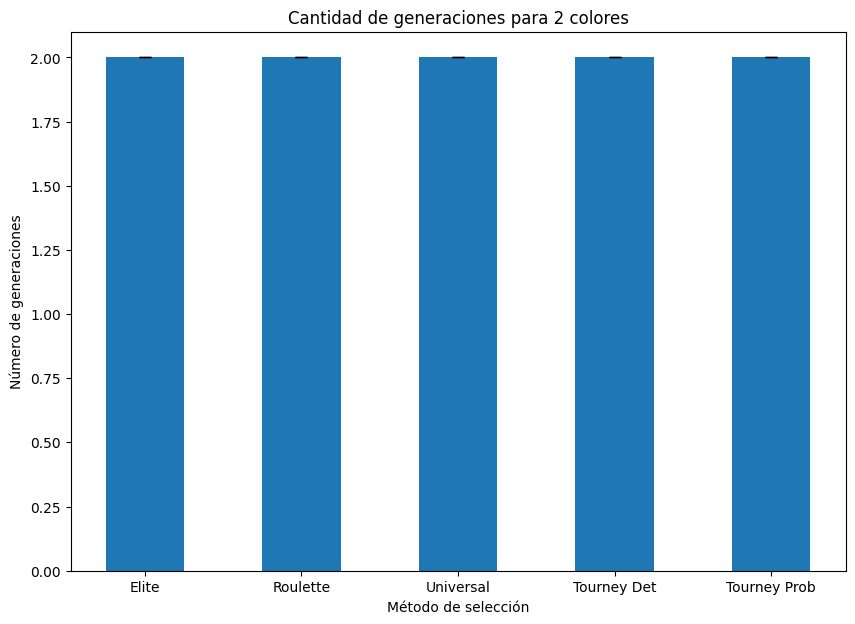

In [12]:
current_crossing = "UNIFORM"
current_mutation = "MULTIGEN_UNIFORM"
current_p_mutation = 0.5
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

selection_options_name = ["Elite", "Roulette", "Universal", "Tourney Det", "Tourney Prob"]
for option in selection_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], option,
                        current_crossing, current_mutation, current_p_mutation,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'seleccion {selection_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)
    
    
print(average_time)
print(std_errors_time)
print(average_generations)
print(std_errors_generations)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(selection_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores')
plt.xlabel('Método de selección')
plt.ylabel('Tiempo promedio de resolución (ms)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(selection_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores')
plt.xlabel('Método de selección')
plt.ylabel('Número de generaciones')
plt.show()

Run variando cruza

ONE_POINT


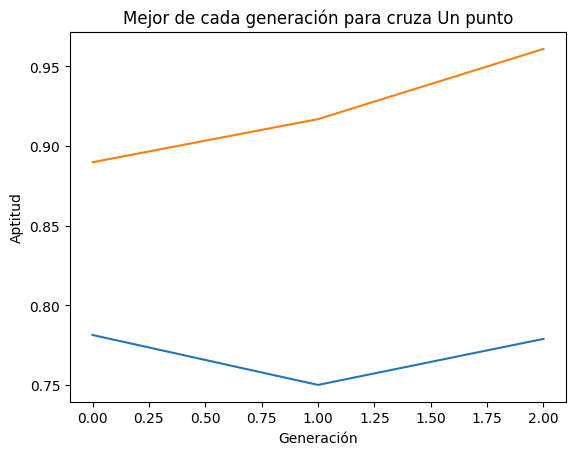

[[0.7814894546183143, 0.7501481807668162, 0.7790299234109292], [0.8899081036336659, 0.9169793656799914, 0.9610211231668371]]
DOUBLE_POINT


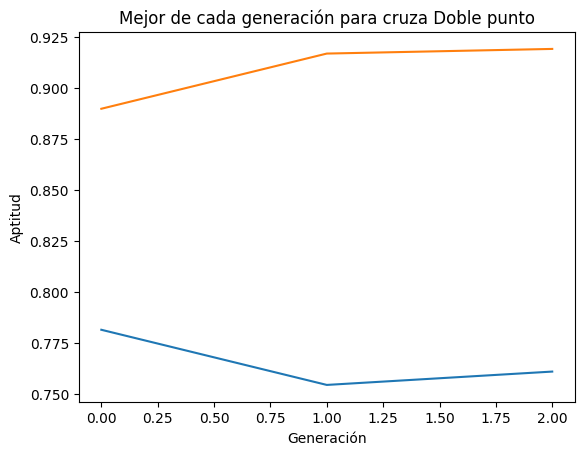

[[0.7814894546183143, 0.7544317384709893, 0.7609788060984151], [0.8899081036336659, 0.9169793656799914, 0.919259677008539]]
ANGULAR


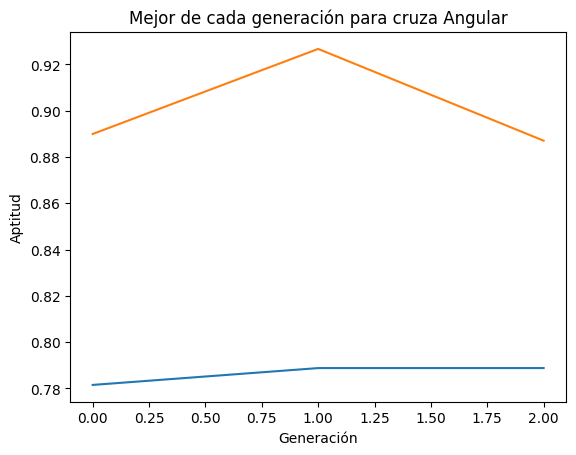

[[0.7814894546183143, 0.7887668671182168, 0.7887668671182168], [0.8899081036336659, 0.9266625267727556, 0.8870241022099506]]
UNIFORM


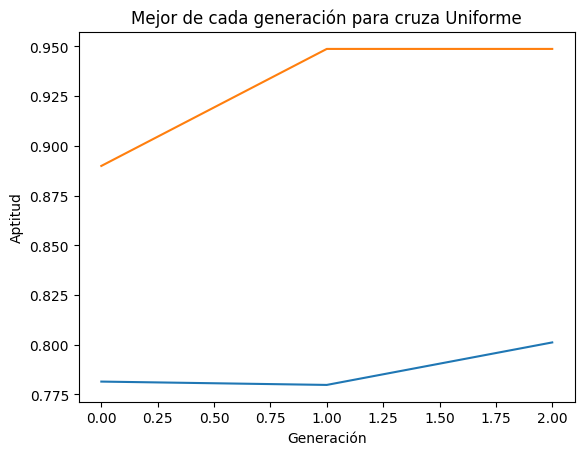

[[0.7814894546183143, 0.779812492147918, 0.8011777127692921], [0.8899081036336659, 0.9487352784959501, 0.9487352784959501]]
[0.15052151679992676, 0.15251421928405762, 0.1689748764038086, 0.15149950981140137]
[0.004584734181015053, 0.0010727215882992748, 0.005649869336582366, 0.003912913415751402]
[2.0, 2.0, 2.0, 2.0]
[0.0, 0.0, 0.0, 0.0]


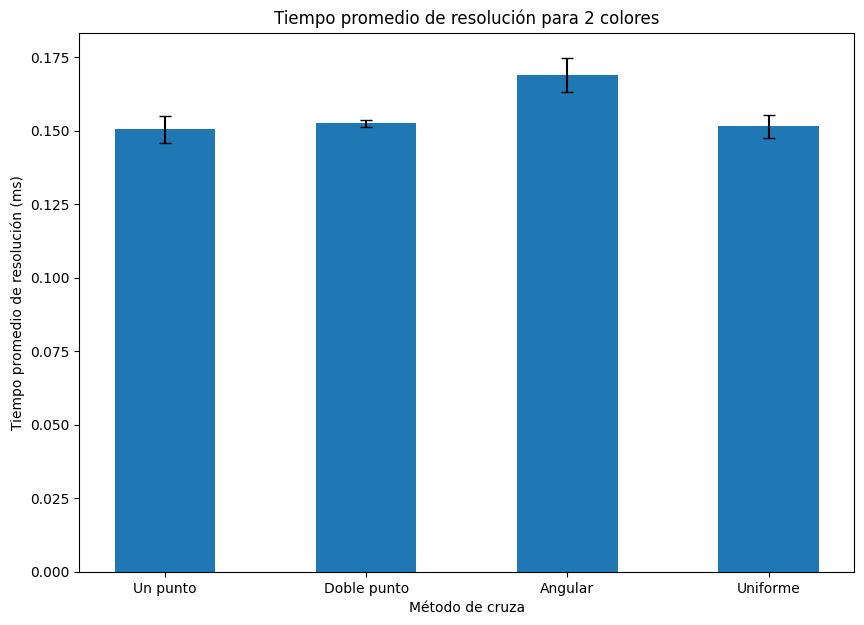

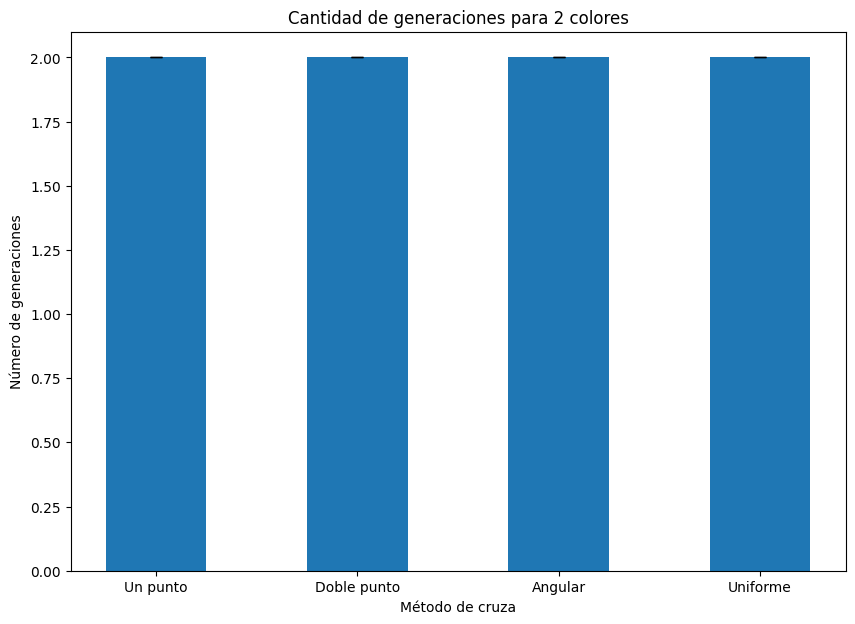

In [13]:
current_selection = "ELITE"
current_crossing = "UNIFORM"
current_p_mutation = 0.5
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

crossing_options_name = ["Un punto", "Doble punto", "Angular", "Uniforme"]
for option in crossing_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], current_selection,
                        option, current_mutation, current_p_mutation,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'cruza {crossing_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

print(average_time)
print(std_errors_time)
print(average_generations)
print(std_errors_generations)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(crossing_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores')
plt.xlabel('Método de cruza')
plt.ylabel('Tiempo promedio de resolución (ms)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(crossing_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores')
plt.xlabel('Método de cruza')
plt.ylabel('Número de generaciones')
plt.show()

Run variando metodo de mutacion

ONE_GEN


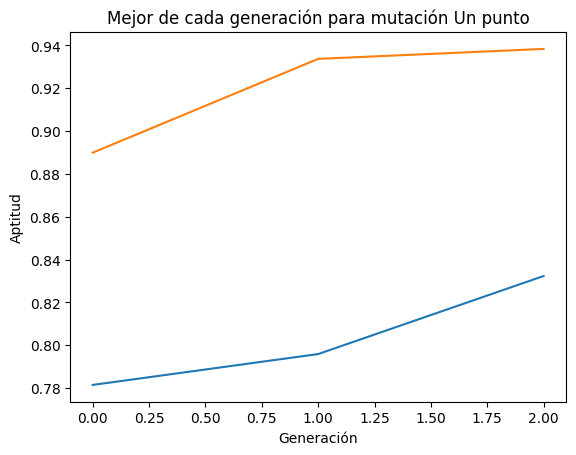

[[0.7814894546183143, 0.795896762017364, 0.8323283854350195], [0.8899081036336659, 0.933704577663466, 0.9383498365099631]]
MULTIGEN_LIMITED


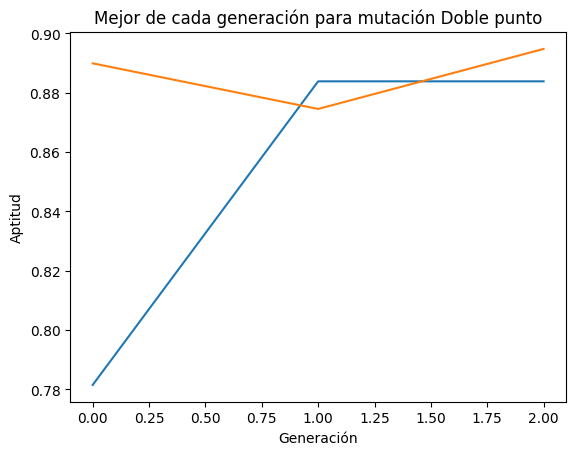

[[0.7814894546183143, 0.8838372779813196, 0.8838372779813196], [0.8899081036336659, 0.8745342043508848, 0.8947651014974194]]
MULTIGEN_UNIFORM


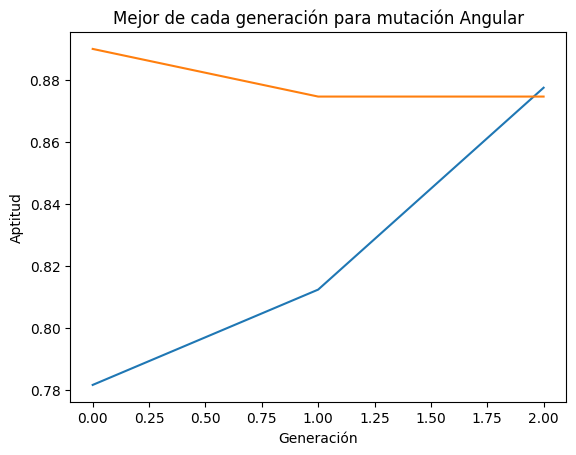

[[0.7814894546183143, 0.8122436803750099, 0.8773894886635323], [0.8899081036336659, 0.8745342043508848, 0.8745342043508848]]
COMPLETE


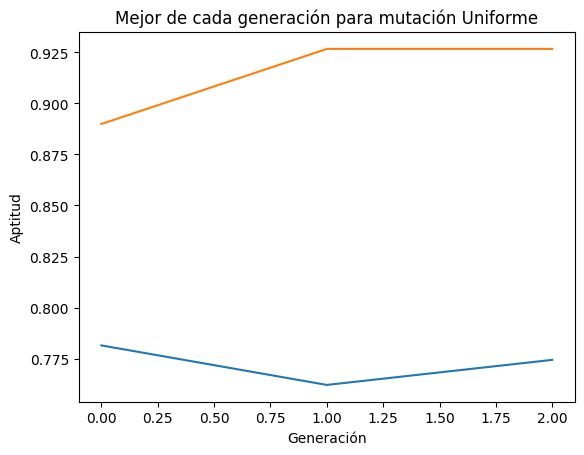

[[0.7814894546183143, 0.7621321924941608, 0.7743986046108882], [0.8899081036336659, 0.9266776433200759, 0.9266776433200759]]
[0.14902007579803467, 0.15649950504302979, 0.16402602195739746, 0.14246726036071777]
[0.004259950566390103, 0.0032148773107139746, 1.3655578917529665e-05, 0.0003430753468786774]
[2.0, 2.0, 2.0, 2.0]
[0.0, 0.0, 0.0, 0.0]


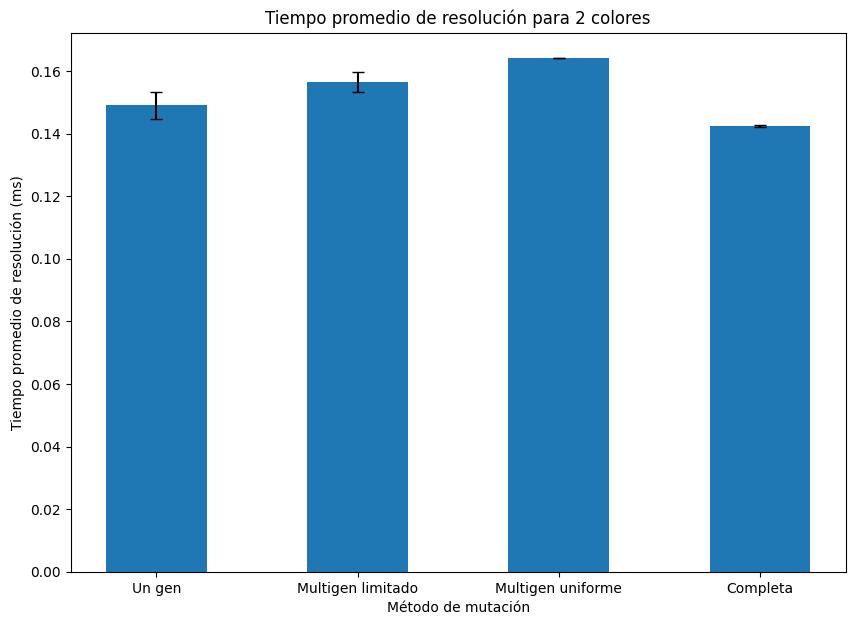

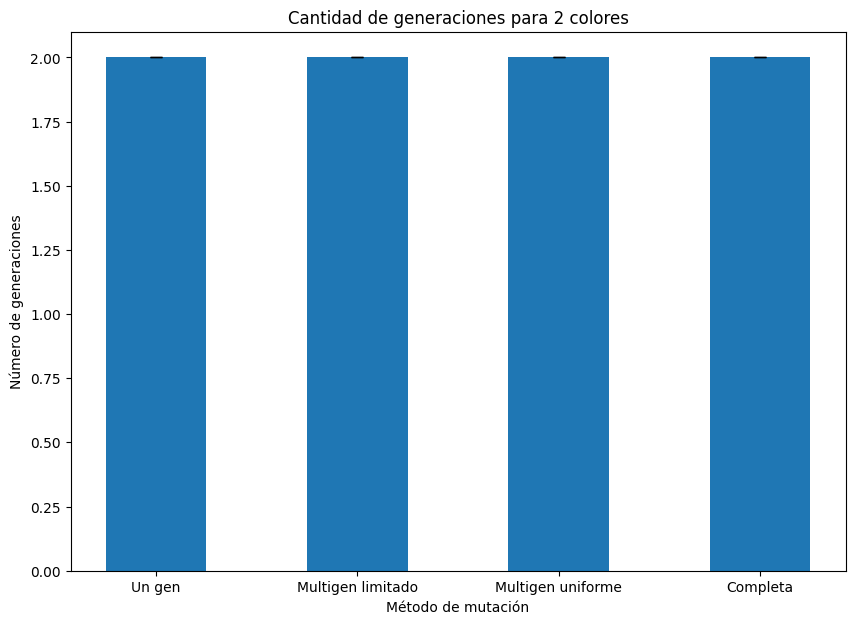

In [14]:
current_selection = "ELITE"
current_crossing = "UNIFORM"
current_p_mutation = 0.5
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

mutation_options_name = ["Un gen", "Multigen limitado", "Multigen uniforme", "Completa"]
for option in mutation_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], current_selection,
                        current_crossing, option, current_p_mutation,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'mutación {crossing_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

print(average_time)
print(std_errors_time)
print(average_generations)
print(std_errors_generations)
    
#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(mutation_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores')
plt.xlabel('Método de mutación')
plt.ylabel('Tiempo promedio de resolución (ms)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(mutation_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores')
plt.xlabel('Método de mutación')
plt.ylabel('Número de generaciones')
plt.show()

Run variando porcentaje de mutación

0.2


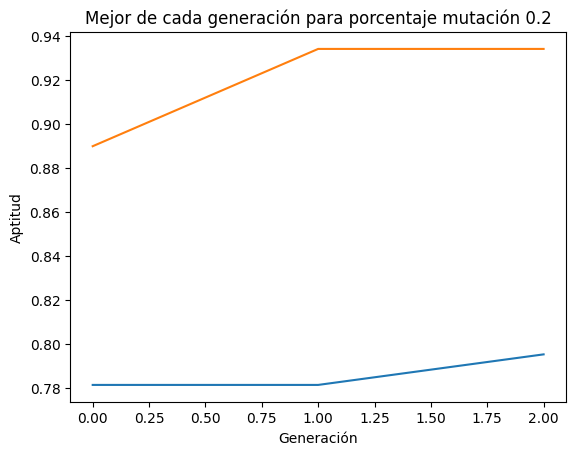

[[0.7814894546183143, 0.7814894546183143, 0.7953668183096213], [0.8899081036336659, 0.9340973644577284, 0.9340973644577284]]
0.4


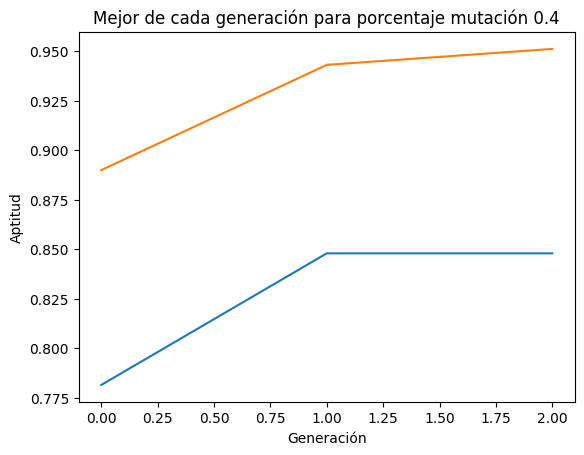

[[0.7814894546183143, 0.8478957736835364, 0.8478957736835364], [0.8899081036336659, 0.9430123091264011, 0.9510496943786099]]
0.6


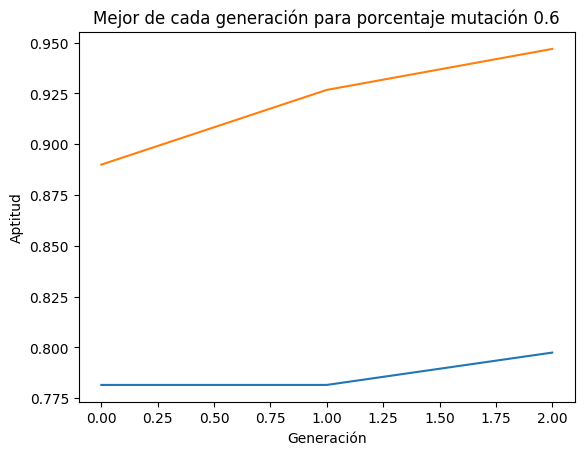

[[0.7814894546183143, 0.7814894546183143, 0.7974013679307556], [0.8899081036336659, 0.9266776433200759, 0.9468477648486202]]
0.8


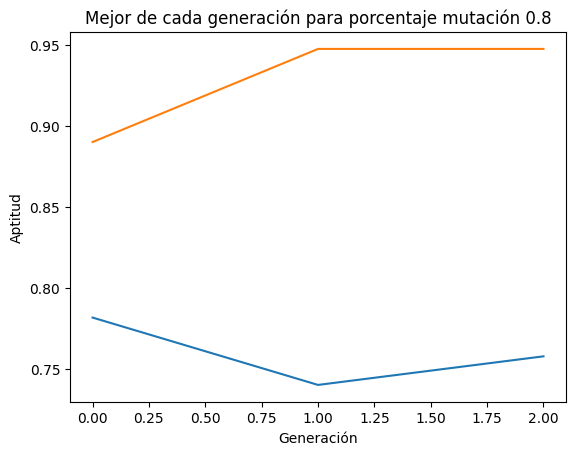

[[0.7814894546183143, 0.7398914598634201, 0.7575485159870039], [0.8899081036336659, 0.9474151370547487, 0.9474151370547487]]
1


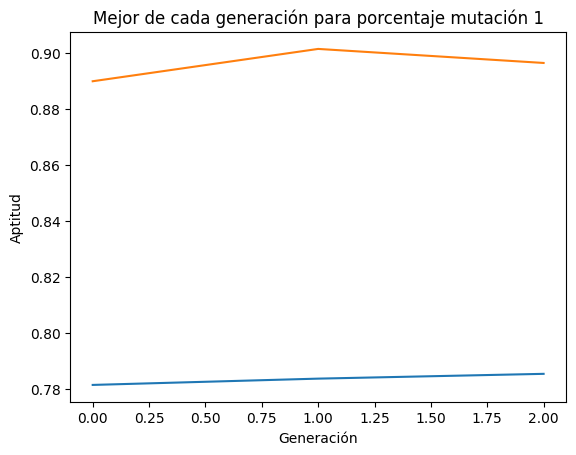

[[0.7814894546183143, 0.7837351594869332, 0.7854461014429414], [0.8899081036336659, 0.9014483520405487, 0.8964371785837012]]
[0.13689112663269043, 0.14749956130981445, 0.17950892448425293, 0.1815199851989746, 0.1975240707397461]
[0.010529631457173677, 0.006717027540878203, 0.008108885066101967, 0.003167757134078795, 0.012363187954791612]
[2.0, 2.0, 2.0, 2.0, 2.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


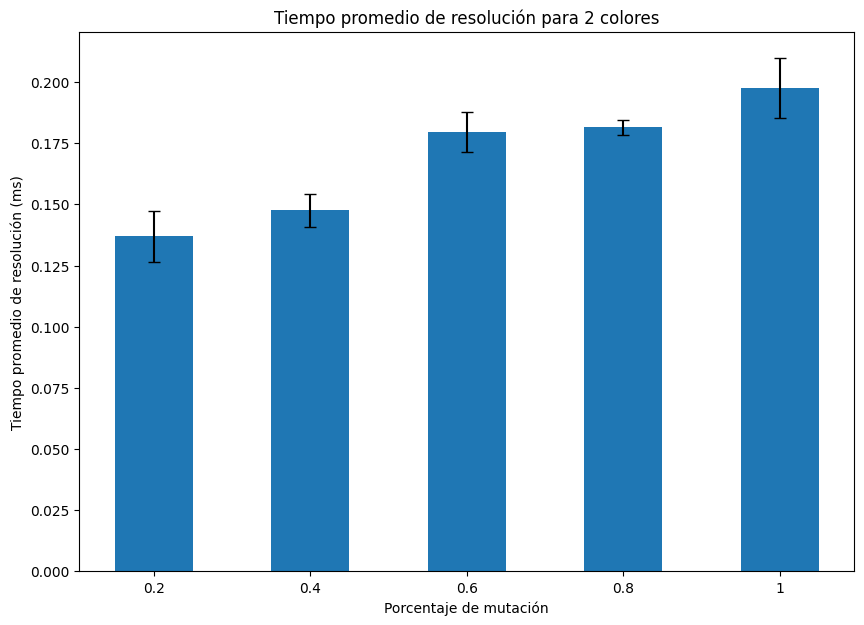

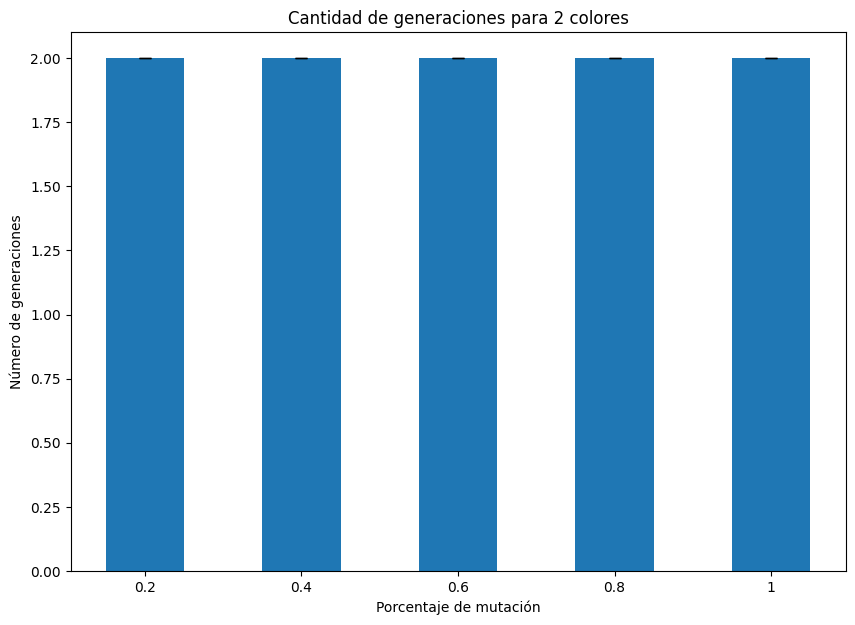

In [15]:
current_selection = "ELITE"
current_crossing = "UNIFORM"
current_mutation = "MULTIGEN_UNIFORM"
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

p_mutation_options = [0.2, 0.4, 0.6, 0.8, 1]
p_mutation_options_name = ["0.2", "0.4", "0.6", "0.8", "1"]
for option in p_mutation_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for i in range(color_count):
        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_colors[i], current_selection,
                        current_crossing, current_mutation, option,
                        current_combination, K, max_generations, d_error, time, start_population[i])

        times.append(time_passed)
        generations.append(generation)
        best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'porcentaje mutación {p_mutation_options[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

print(average_time)
print(std_errors_time)
print(average_generations)
print(std_errors_generations)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(p_mutation_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores')
plt.xlabel('Porcentaje de mutación')
plt.ylabel('Tiempo promedio de resolución (ms)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(p_mutation_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores')
plt.xlabel('Porcentaje de mutación')
plt.ylabel('Número de generaciones')
plt.show()